In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
from sklearn.cluster import KMeans
from sklearn import datasets

In [20]:
data= pd.read_csv(r"C:\Users\Student\Downloads\iris.data")
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
data.columns=['cl1','cl2','cl3','cl4','label']

In [30]:
data.head(10)

,cl1,cl2,cl3,cl4,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [33]:
data.drop('label',axis=1,inplace=True)

In [35]:
data.head()

,cl1,cl2,cl3,cl4
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled)
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,5.700138e-17,1.583372e-17,1.900046e-16,-3.949115e-17
std,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00
min,-1.874916e+00,-2.432651e+00,-1.582049e+00,-1.456862e+00
25%,-9.061687e-01,-5.809779e-01,-1.239922e+00,-1.193264e+00
50%,-5.851493e-02,-1.180597e-01,3.566690e-01,1.247222e-01
75%,6.680455e-01,5.763177e-01,7.558168e-01,7.837155e-01
max,2.484446e+00,3.122368e+00,1.782197e+00,1.706306e+00


In [45]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [46]:
kmeans.inertia_

141.25052805553315

Text(0, 0.5, 'Inertia')

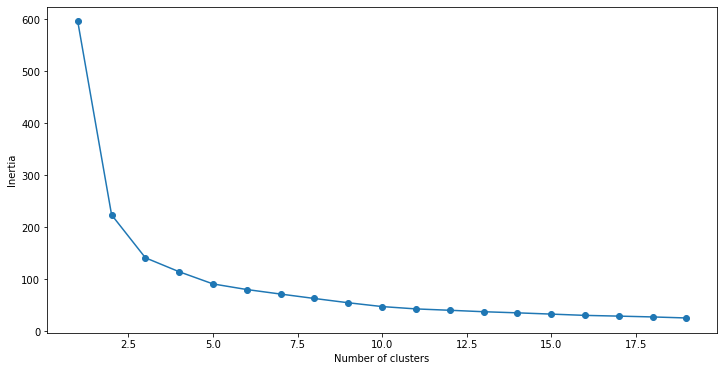

In [48]:
SSE = []   
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
pp.figure(figsize=(12,6))
pp.plot(frame['Cluster'], frame['SSE'], marker='o')
pp.xlabel('Number of clusters')
pp.ylabel('Inertia')